<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P6_01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 6

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 6


Importation des librairies nécessaires au projet

In [3]:
#instalation librairie:
%pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.8 MB/s 


In [ ]:
import SimpleITK as sitk

In [5]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import seaborn as sn
import pandas 
import sys, time, os
import random
from PIL import Image


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from joblib import dump, load
from scipy import linalg
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , classification_report

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


from pickle import dump

import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [ ]:
### ACD ###
image_directory="Images_samples_10_races"

doc importation des données keras : 
https://keras.io/api/data_loading/image/#image_dataset_from_directory-function

In [ ]:
X=[]
Y=[]
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image_filepath = os.path.join(path, file)
        image = Image.open(image_filepath) 
        X.append(np.asarray(image))
        NomRace=path.split("-")[-1]
        Y.append(NomRace)
         

#convert images list to array
X=np.asarray(X)
Y=np.asarray(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


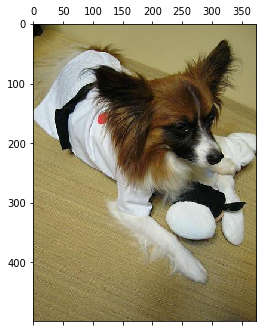

In [ ]:
plt.matshow(X[0])

In [ ]:
Y[0]

'papillon'

In [ ]:
dump(X, "image_sample.joblib")
dump(Y, "label.joblib")

['label.joblib']

In [6]:
X_raw = load("image_sample.joblib")
Y = load("label.joblib")

# Préprocessing des images

## Taille des images

In [ ]:
taille_x_images = []
taille_y_images = []
for elm in X:
    taille_x_images.append(elm.shape[0])
    taille_y_images.append(elm.shape[1])    

In [ ]:
print("la taille en x minimale des images est de : " + str(min(taille_x_images)))
print("la taille en y minimale des images est de : " + str(min(taille_y_images)))

la taille en x minimale des images est de : 100
la taille en y minimale des images est de : 97


In [ ]:
taille_x_min = min(taille_x_images)
taille_y_min = min(taille_y_images)

In [ ]:
############# lecture des fichiers image ###########
i = 0
for file in image_filepath_sample:
    image = Image.open(file)  
    resized_image = image.resize((taille_x_min,taille_y_min))
    imgray = resized_image.convert(mode='L') # graysacle
    imgray.save("Images_samples_10_races_resized_gray/" + str(i) + ".jpg")
    i += 1

In [ ]:
X_resized=[]
for path, dirs, files in os.walk("Images_samples_10_races_resized_gray"):
    for file in files:
        resized_image_np = sitk.GetArrayFromImage(sitk.ReadImage("Images_samples_10_races_resized_gray/" + file))
        X_resized.append(np.asarray(resized_image_np))     

#convert images list to array
X_resized=np.asarray(X_resized)

papillon


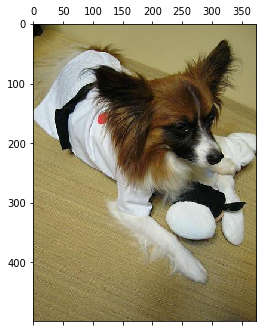

In [ ]:
plt.matshow(X[0])
print(Y[0])

papillon


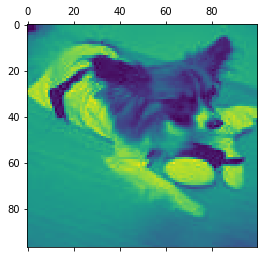

In [ ]:
plt.matshow(X_resized[0])
print(Y[0])

Le but de cette approche est d'avoir la même taille d'image pour toutes les images, de façon à rendre le modèle plus performant

In [ ]:
X.shape

(1942,)

In [ ]:
X_resized.shape

(1942, 97, 100)

In [ ]:
dump(X_resized, "matrice_image_resized.joblib")

['matrice_image_resized.joblib']

In [5]:
X = load("matrice_image_resized.joblib")
Y = load("label.joblib")

## Equalization

In [ ]:
def image_equalizor(img_array):
    """ perform image equalization """

    ######################################
    # PERFORM HISTOGRAM EQUALIZATION
    ######################################

    """
    STEP 1: Normalized cumulative histogram
    """
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)

    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels

    #normalized cumulative histogram
    chistogram_array = np.cumsum(histogram_array)


    """
    STEP 2: Pixel mapping lookup table
    """
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    """
    STEP 3: Transformation
    """
    # flatten image array into 1D list
    img_list = list(img_array.flatten())

    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]

    # reshape and write back into img_array
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

    return eq_img_array

In [ ]:
test = image_equalizor(X[0])

In [ ]:
test

array([[  0,   0,   1, ..., 128, 125, 119],
       [  4,   1,   0, ..., 130, 128, 121],
       [  0,   0,   0, ..., 135, 130, 128],
       ...,
       [ 74,  76,  78, ...,  48,  48,  48],
       [ 71,  73,  76, ...,  46,  46,  46],
       [ 74,  78,  79, ...,  43,  44,  45]], dtype=uint8)

In [ ]:
X_equal = []
for elm in X:
    X_equal.append(image_equalizor(elm))

X_equal = np.array(X_equal)

Avant equalization

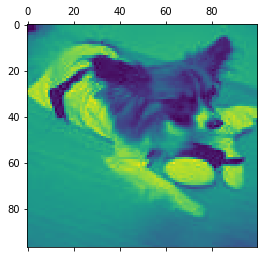

In [ ]:
plt.matshow(X[0])

Après equalization

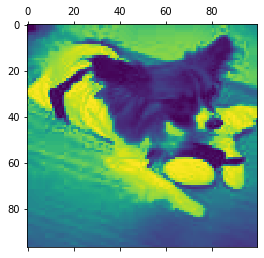

In [ ]:
plt.matshow(X_equal[0])

Le but de cette approche est d'égaliser les histogrammes des images entre elles de façon à augmenter les contrastes et améliorer les input du modèle

In [ ]:
dump(X, "equalized_image.joblib")

['equalized_image.joblib']

In [28]:
X = load("equalized_image.joblib")
Y = load("label.joblib")

## Whitening

In [ ]:
X.shape

(1942, 97, 100)

In [ ]:
# Center data
# By subtracting mean for each feature
x_norm = X.T - np.mean(X.T, axis=0)
x_norm = x_norm.T
print('x_norm.shape:', x_norm.shape, '\n')

x_norm.shape: (1942, 97, 100) 



In [ ]:
def image_whitenor(xc):
    """ Performe the whitning process on a matrix and return the whitened matrix """
    # Calculate covariance matrix
    xcov = np.cov(xc, rowvar=True, bias=True)
    print('Covariance matrix: \n', xcov, '\n')

    # Calculate Eigenvalues and Eigenvectors
    w, v = linalg.eig(xcov)
    # Note: Use w.real.round(4) to (1) remove 'j' notation to real, (2) round to '4' significant digits
    print("Eigenvalues:\n", w.real.round(4), '\n')
    print("Eigenvectors:\n", v, '\n')
    
    # Calculate inverse square root of Eigenvalues
    # Optional: Add '.1e5' to avoid division errors if needed
    # Create a diagonal matrix
    diagw = np.diag(1/(w**0.5)) # or np.diag(1/((w+.1e-5)**0.5))
    diagw = diagw.real.round(4) #convert to real and round off
    print("Diagonal matrix for inverse square root of Eigenvalues:\n", diagw, '\n')
    
    # Calculate Rotation (optional)
    # Note: To see how data can be rotated
    xrot = np.dot(v, xc)
    
    # Whitening transform using PCA (Principal Component Analysis)
    wpca = np.dot(np.dot(diagw, v.T), xc)
    
    # Whitening transform using ZCA (Zero Component Analysis)
    wzca = np.dot(np.dot(np.dot(v, diagw), v.T), xc)

    return wzca

In [ ]:
X_whitened

Avant whitening

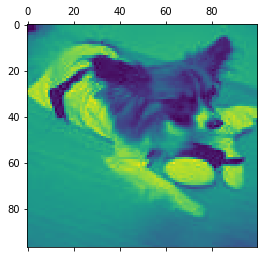

In [ ]:
plt.matshow(X[0])

Après whitening

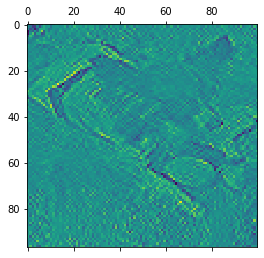

In [ ]:
plt.matshow(X_whitened[0])

Le but de cette approche est de décorréler les features entre eux, de façon à donner au modèle moins de données redondantes et donc d'améliorer les performances du modèle

In [ ]:
dump(X_whitened, "whitened_image.joblib")

['whitened_image.joblib']

In [ ]:
X = load("whitened_image.joblib")
Y = load("label.joblib")

## Data augmentation

In [ ]:
## j'ai mis ce processus directement dans l'architecture du modèle de deep learning, cf plus bas

# Modélisation Deep Learning

In [184]:
# Encodage des labels
le = preprocessing.LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [ ]:
dump(Y_encoded, "Y_encoded.joblib")

In [30]:
Y_encoded[:300]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.20, random_state = 7)

In [32]:
[img_height, img_width] = X_train[0].shape

# Impact de la fonction d'optimisation sur les performances du modèle

## CNN-ADAM

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ADAM = cnn.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn.summary()

## CNN-SGD

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_SGD = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_SGD.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_SGD = cnn_SGD.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_SGD.summary()

## CNN RMSprop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_RMSprop = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_RMSprop.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_RMSprop = cnn_RMSprop.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_RMSprop.summary()

## CNN Adadelta

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adadelta = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adadelta.compile(optimizer='Adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adadelta = cnn_Adadelta.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adadelta.summary()

## CNN Adagrad

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adagrad = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adagrad.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adagrad = cnn_Adagrad.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adagrad.summary()

## CNN Adamax

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adamax = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adamax.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adamax = cnn_Adamax.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adamax.summary()

## CNN Nadam

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Nadam = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Nadam.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Nadam = cnn_Nadam.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Nadam.summary()

## CNN Ftrl

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Ftrl = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Ftrl.compile(optimizer='Ftrl',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Ftrl = cnn_Ftrl.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Ftrl.summary()

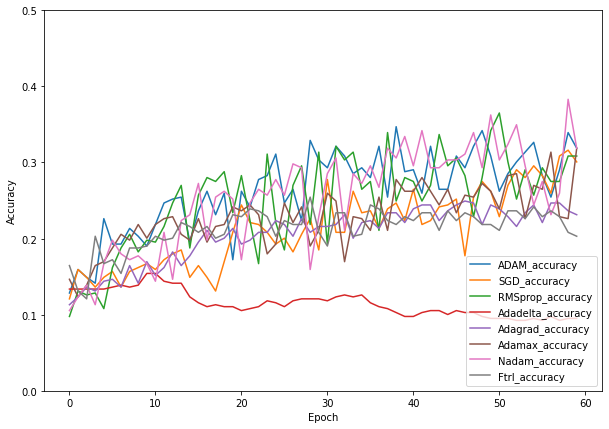

In [ ]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_ADAM.history['val_accuracy'], label='ADAM_accuracy')
plt.plot(history_SGD.history['val_accuracy'], label = 'SGD_accuracy')
plt.plot(history_RMSprop.history['val_accuracy'], label = 'RMSprop_accuracy')
plt.plot(history_Adadelta.history['val_accuracy'], label = 'Adadelta_accuracy')
plt.plot(history_Adagrad.history['val_accuracy'], label = 'Adagrad_accuracy')
plt.plot(history_Adamax.history['val_accuracy'], label = 'Adamax_accuracy')
plt.plot(history_Nadam.history['val_accuracy'], label = 'Nadam_accuracy')
plt.plot(history_Ftrl.history['val_accuracy'], label = 'Ftrl_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("accuracy_functions_CNNs", dpi=400, format='png') 

# Impact de la fonction de loss sur les performances du modèle

## Sparse Categorical Cross Entropy

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_SCC = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_SCC.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_Adam_SCC = cnn_Adam_SCC.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_SCC.summary()

## Poisson

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_poisson = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_poisson.compile(optimizer='Adam',
              loss='poisson',
              metrics=['accuracy'])

history_Adam_poisson = cnn_Adam_poisson.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_poisson.summary()

## KLDivergence

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_KLD = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_KLD.compile(optimizer='Adam',
              loss='kl_divergence',
              metrics=['accuracy'])

history_Adam_KLD = cnn_Adam_KLD.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_KLD.summary()

## Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_hinge.compile(optimizer='Adam',
              loss='hinge',
              metrics=['accuracy'])

history_Adam_hinge = cnn_Adam_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_hinge.summary()

## Squared Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_sq_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_sq_hinge.compile(optimizer='Adam',
              loss='squared_hinge',
              metrics=['accuracy'])

history_Adam_sq_hinge = cnn_Adam_sq_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_sq_hinge.summary()

## Categorical Hinge

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_cat_hinge = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_Adam_cat_hinge.compile(optimizer='Adam',
              loss='categorical_hinge',
              metrics=['accuracy'])

history_Adam_cat_hinge = cnn_Adam_cat_hinge.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_cat_hinge.summary()

## Résultats

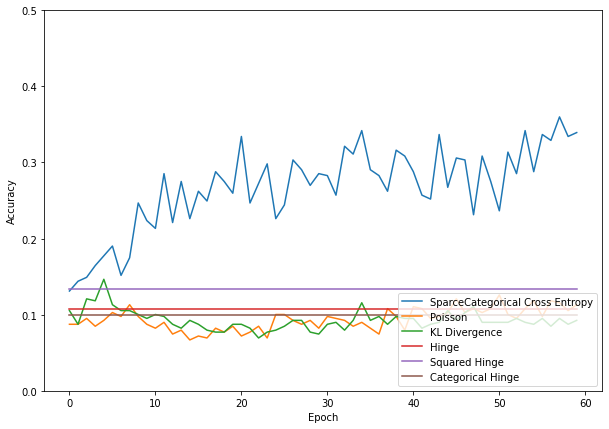

In [54]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_Adam_SCC.history['val_accuracy'], label='SparceCategorical Cross Entropy')
plt.plot(history_Adam_poisson.history['val_accuracy'], label = 'Poisson')
plt.plot(history_Adam_KLD.history['val_accuracy'], label = 'KL Divergence')
plt.plot(history_Adam_hinge.history['val_accuracy'], label = 'Hinge')
plt.plot(history_Adam_sq_hinge.history['val_accuracy'], label = 'Squared Hinge')
plt.plot(history_Adam_cat_hinge.history['val_accuracy'], label = 'Categorical Hinge')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("losses_functions_CNNs", dpi=400, format='png') 

# Impact de la fonction d'activation sur les performances du modèle

## Softmax

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_softmax = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_softmax.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softmax = cnn_softmax.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_softmax.summary()

## Relu

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_Adam_relu = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='relu') #nombre de label
])

cnn_Adam_relu.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_relu = cnn_Adam_relu.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_Adam_relu.summary()

## Sigmoid

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_sigmoid = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid') #nombre de label
])

cnn_sigmoid.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid = cnn_sigmoid.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_sigmoid.summary()

## Softplus

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_softplus = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softplus') #nombre de label
])

cnn_softplus.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_softplus = cnn_softplus.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_softplus.summary()

## Tanh

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_tanh = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='tanh') #nombre de label
])

cnn_tanh.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_tanh = cnn_tanh.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_tanh.summary()

## Résultats

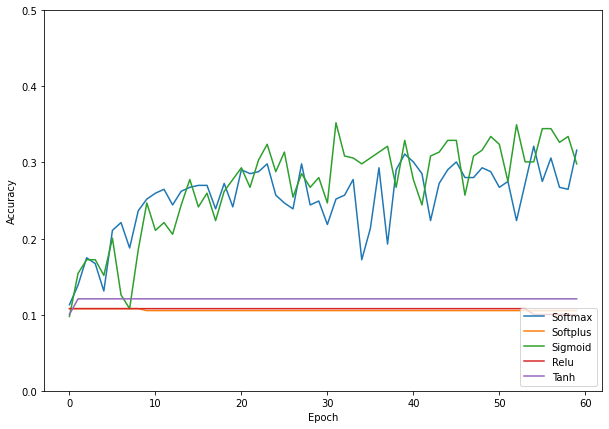

In [67]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_softmax.history['val_accuracy'], label='Softmax')
plt.plot(history_softplus.history['val_accuracy'], label = 'Softplus')
plt.plot(history_sigmoid.history['val_accuracy'], label = 'Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label = 'Relu')
plt.plot(history_relu.history['val_accuracy'], label = 'Tanh')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("activation_functions_CNNs", dpi=400, format='png') 

13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1337
Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.83      0.45        52
           1       0.50      0.29      0.37        41
           2       0.68      0.33      0.45        39
           3       0.55      0.62      0.58        47
           4       0.20      0.04      0.07        25
           5       0.19      0.17      0.18        35
           6       1.00      0.05      0.09        42
           7       0.27      0.49      0.35        39
           8       0.44      0.21      0.28        39
           9       0.31      0.27      0.29        30

    accuracy                           0.36       389
   macro avg       0.45      0.33      0.31       389
weighted avg       0.46      0.36      0.33       389



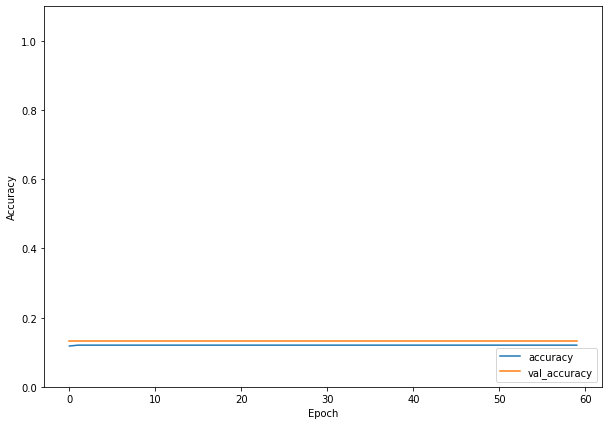

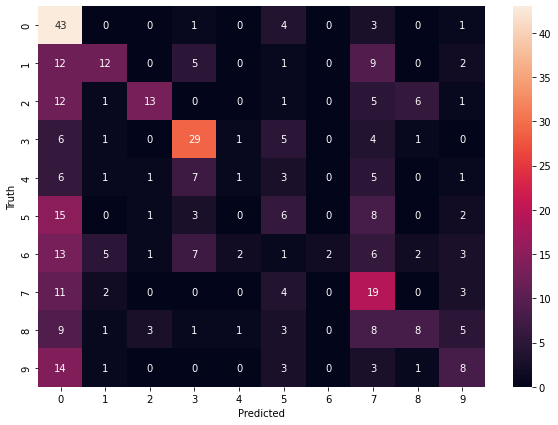

In [13]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.1])
plt.legend(loc='lower right')
plt.savefig("accuracy_function_CNN_SGD", dpi=400, format='png') 

cnn_SGD.evaluate(X_test,y_test)
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_CNN_SGD", dpi=400, format='png') 

# rapport de classification:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

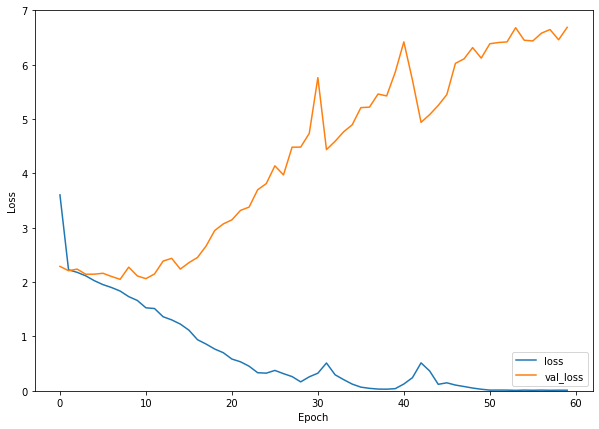

In [13]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 7])
plt.legend(loc='lower right')
plt.savefig("loss_function_CNN_data_augm_less", dpi=400, format='png') 

# Impact de l'architecture du modèle (drop and normalization batch)

## Avec Drop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_drop_with = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.2),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_drop_with.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_drop_with = cnn_drop_with.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_drop_with.summary()

## Sans Drop

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_drop_less = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_drop_less.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_drop_less = cnn_drop_less.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_drop_less.summary()

## Avec Batch normalization

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_batch_N = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_batch_N.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_batch_N_with = cnn_with_batch_N.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_batch_N.summary()

## Drop + Batch Normalization

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_batch_drop = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_batch_drop.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_batch_drop_with = cnn_with_batch_drop.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_batch_drop.summary()

## Résultats

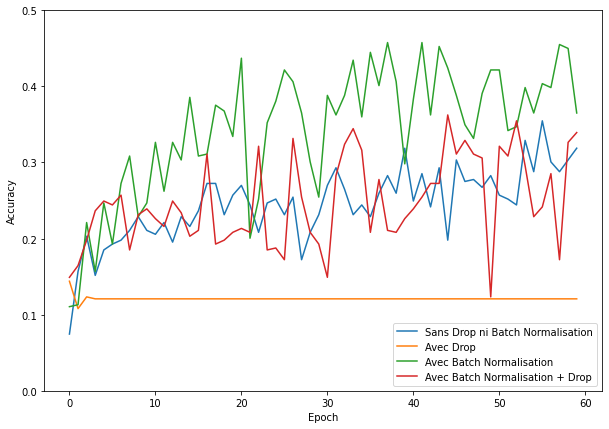

In [66]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_drop_less.history['val_accuracy'], label='Sans Drop ni Batch Normalisation')
plt.plot(history_drop_with.history['val_accuracy'], label = 'Avec Drop')
plt.plot(history_batch_N_with.history['val_accuracy'], label = 'Avec Batch Normalisation')
plt.plot(history_batch_drop_with.history['val_accuracy'], label = 'Avec Batch Normalisation + Drop')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("drop_batch_CNNs", dpi=400, format='png') 

# Impact du flatten avant les couches denses

## Sans flatten

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_flatten_less = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    #layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(img_height,img_width,1)),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    #layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_flatten_less.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_flatten_less = cnn_flatten_less.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_flatten_less.summary()

## Avec flatten

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_flatten = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_flatten.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_with_flatten = cnn_with_flatten.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_flatten.summary()

## Résultats

In [ ]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_with_flatten = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_with_flatten.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_with_flatten = cnn_with_flatten.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_with_flatten.summary()

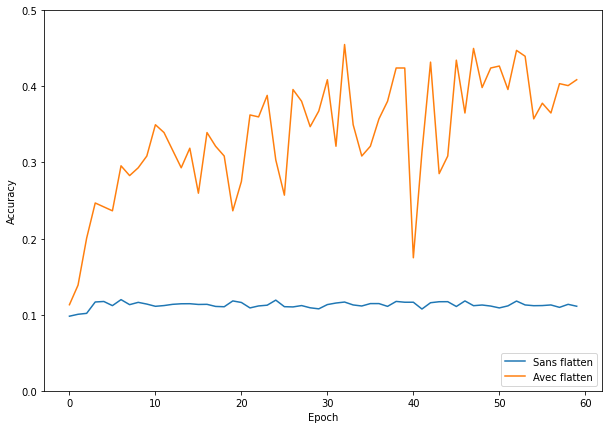

In [72]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_flatten_less.history['val_accuracy'], label='Sans flatten')
plt.plot(history_with_flatten.history['val_accuracy'], label = 'Avec flatten')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')
plt.savefig("flatten_CNNs", dpi=400, format='png') 

# Modèle final

In [33]:
#convolutionnal neural network:


data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=(-0.05,0.05), fill_mode='reflect', interpolation='bilinear', fill_value=0.0,input_shape=(img_height, img_width, 1)), #rotation de 0.05% de 2*pi-> -/+20 degré
    layers.RandomZoom( height_factor=(-0.15,0.15), width_factor=(-0.15,0.15), fill_mode='reflect', interpolation='bilinear', fill_value=0.0), #changement de zoom de +/- 15%
    layers.RandomContrast(factor=(0.9,1.1)), #variation de 10% du contrast
    layers.RandomFlip(mode="horizontal")
  ]
)

cnn_final = models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_final.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_final = cnn_final.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

cnn_final.summary()

Epoch 1/60
49/49 [==============================] - 5s 27ms/step - loss: 2.3268 - accuracy: 0.1603 - val_loss: 2.7133 - val_accuracy: 0.1208
Epoch 2/60
49/49 [==============================] - 1s 12ms/step - loss: 2.0950 - accuracy: 0.2543 - val_loss: 2.2856 - val_accuracy: 0.1877
Epoch 3/60
49/49 [==============================] - 1s 18ms/step - loss: 1.9711 - accuracy: 0.3039 - val_loss: 2.2616 - val_accuracy: 0.2339
Epoch 4/60
49/49 [==============================] - 1s 12ms/step - loss: 1.9020 - accuracy: 0.3426 - val_loss: 2.2965 - val_accuracy: 0.2185
Epoch 5/60
49/49 [==============================] - 1s 10ms/step - loss: 1.8581 - accuracy: 0.3471 - val_loss: 1.9871 - val_accuracy: 0.3265
Epoch 6/60
49/49 [==============================] - 0s 10ms/step - loss: 1.7927 - accuracy: 0.3735 - val_loss: 2.0950 - val_accuracy: 0.3111
Epoch 7/60
49/49 [==============================] - 1s 10ms/step - loss: 1.7465 - accuracy: 0.3960 - val_loss: 2.3896 - val_accuracy: 0.2211
Epoch 8/60
49

## Résultats

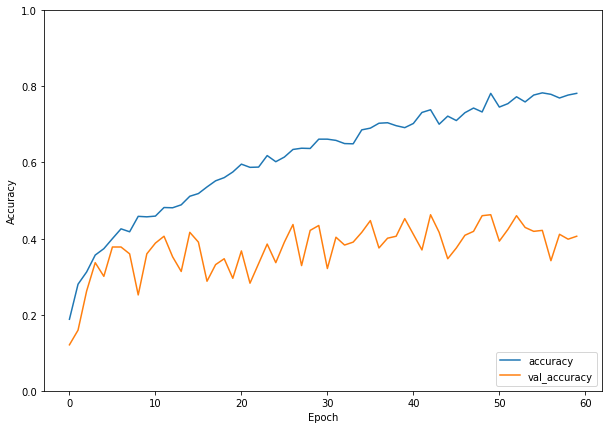

In [75]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_with_flatten.history['accuracy'], label='accuracy')
plt.plot(history_with_flatten.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("model_final_CNN", dpi=400, format='png') 

13/13 [==============================] - 0s 7ms/step - loss: 2.2267 - accuracy: 0.4062
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.81      0.51        52
           1       0.49      0.44      0.46        41
           2       0.81      0.44      0.57        39
           3       0.75      0.45      0.56        47
           4       0.15      0.16      0.16        25
           5       0.19      0.37      0.25        35
           6       0.26      0.21      0.23        42
           7       0.41      0.28      0.33        39
           8       0.85      0.28      0.42        39
           9       0.57      0.40      0.47        30

    accuracy                           0.41       389
   macro avg       0.48      0.38      0.40       389
weighted avg       0.50      0.41      0.41       389



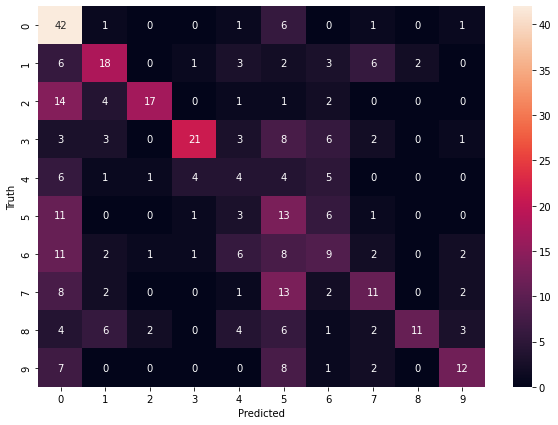

In [78]:
#performance du model
cnn_with_flatten.evaluate(X_test,y_test)
y_predicted = cnn_with_flatten.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_model_final_CNN", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

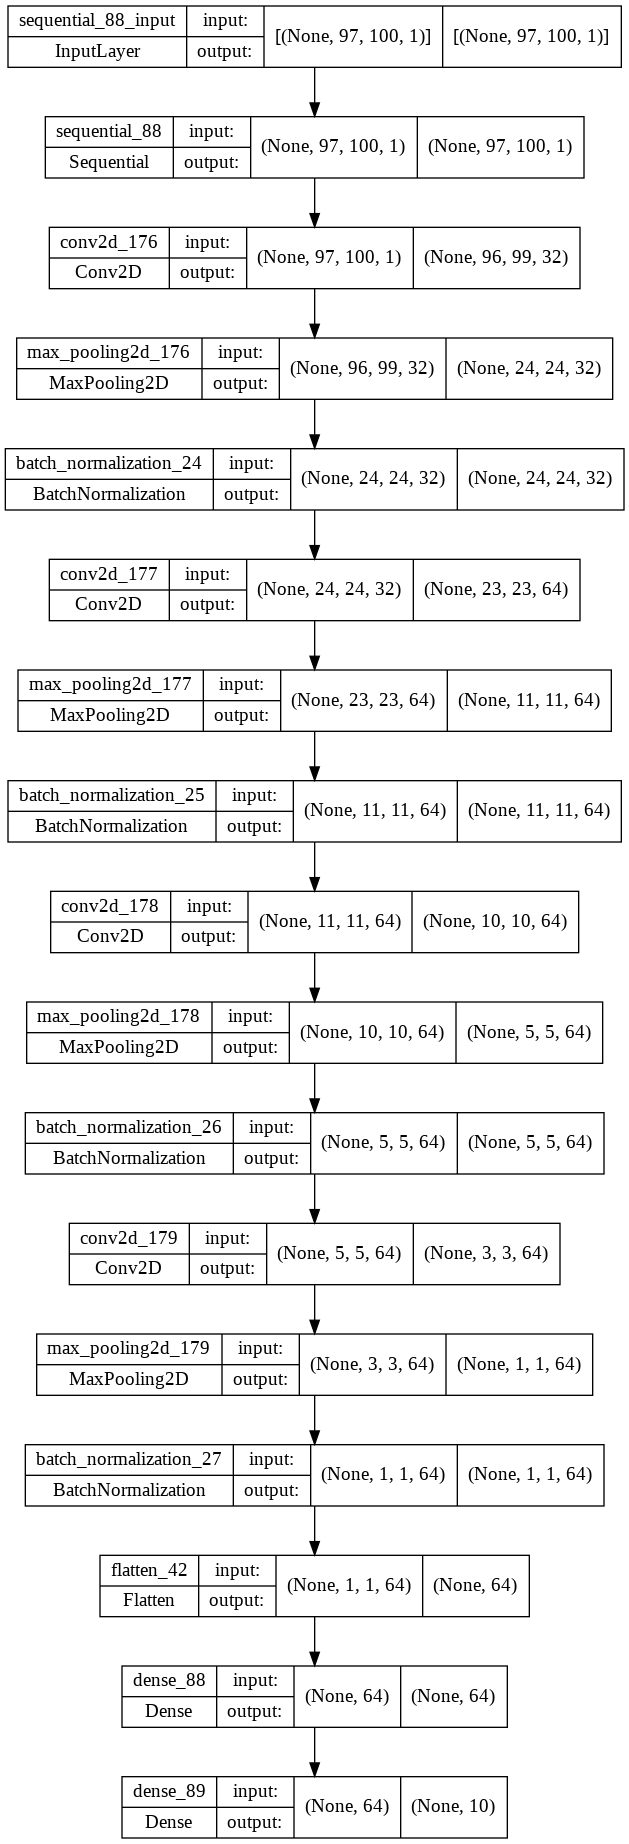

In [80]:
keras.utils.plot_model(cnn_with_flatten, show_shapes=True)

In [35]:
with open("history_cnn_final.joblib","wb") as f:
    dump(history_cnn_final, f)

INFO:tensorflow:Assets written to: ram://15bbabae-6991-49fd-9b92-8f921f75f329/assets


In [11]:
dump(cnn_with_flatten, "DL_baseline_model.joblib")


INFO:tensorflow:Assets written to: ram://47f77994-36bd-415b-9474-3a0a376bf296/assets


['DL_baseline_model.joblib']

In [ ]:
DL_baseline_model = load("DL_baseline_model.joblib")
cnn = load("DL_baseline_model.joblib")

# Compréhension des erreurs du modèles

In [ ]:
print("id des photos avec label = 0")
print(np.where(Y_encoded==0))

print("id des photos avec label = 5")
print(np.where(Y_encoded==5))

id des photos avec label = 0
(array([569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
       608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646,
       647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659,
       660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672,
       673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
       686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698,
       699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711,
       712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724,
       725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737,
       738, 739, 740, 741, 742, 74

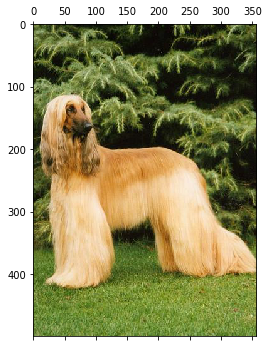

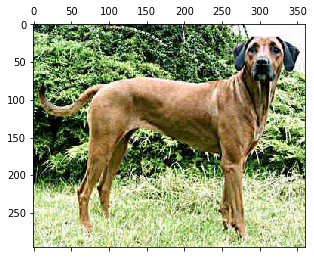

In [ ]:
#exemple de classification où il ne prédit pas très bien
plt.matshow(X_raw[574]) # ou 580, 570
plt.matshow(X_raw[1785])

In [ ]:
#Y_encoded[Y_encoded==1]
print("id des photos avec label = 1")
print(np.where(Y_encoded==1))

print("id des photos avec label = 7")
print(np.where(Y_encoded==7))

id des photos avec label = 1
(array([196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 37

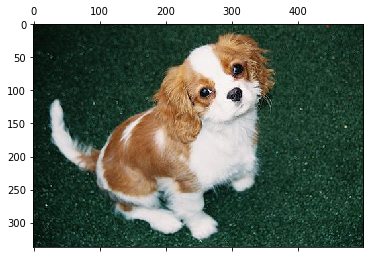

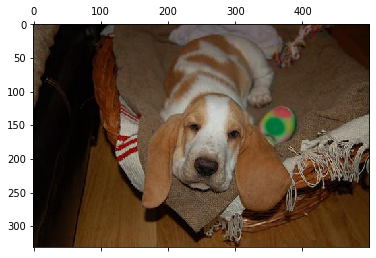

In [ ]:
#exemple de classification où il ne prédit pas très bien
plt.matshow(X_raw[197]) # ou 
plt.matshow(X_raw[816]) # ou 809, 810, 817, 823

In [ ]:
dump(cnn, "DL_baseline_model.joblib")

INFO:tensorflow:Assets written to: ram://2fa77c0f-f70c-4c41-a5e5-fe409bc1c8ba/assets


['DL_baseline_model.joblib']

In [19]:
DL_baseline_model = load("DL_baseline_model.joblib")
cnn = load("DL_baseline_model.joblib")

# Transfert Learning

In [7]:
# load the baseline DL model
DL_baseline_model = load("DL_baseline_model.joblib")
X = load("equalized_image.joblib")
Y_encoded = load("Y_encoded.joblib")

## Chargement des images en couleurs

In [6]:
X_raw = load("image_sample.joblib")

In [15]:
X = load("matrice_image_resized.joblib")

In [36]:
### ACD ###
image_directory="Images_samples_10_races"

In [49]:
image_filepath_sample = []
for path, dirs, files in os.walk(image_directory):
    for file in files:
        image_filepath = os.path.join(path, file)
        image_filepath_sample.append(image_filepath)

In [51]:
############# lecture des fichiers image ###########
i = 0
for file in image_filepath_sample:
    image = Image.open(file)  
    resized_image = image.resize((224,224))
    #imgray = resized_image.convert(mode='L') # graysacle
    resized_image.save("Images_samples_10_races_resized/" + str(i) + ".jpg")
    i += 1

In [7]:
X_resized_RGB=[]
for path, dirs, files in os.walk("Images_samples_10_races_resized"):
    for file in files:
        resized_image_np = sitk.GetArrayFromImage(sitk.ReadImage("Images_samples_10_races_resized/" + file))
        X_resized_RGB.append(np.asarray(resized_image_np))     

#convert images list to array
X_resized_RGB=np.asarray(X_resized_RGB)

In [8]:
X_resized_RGB.shape

(1942, 224, 224, 3)

In [16]:
with open("X_resized_RGB.joblib","wb") as f:
    dump(X_resized_RGB, f)

## Application des modèles de transfert learning

In [4]:
X_resized_RGB = load("X_resized_RGB.joblib")

### VGG16

In [56]:
image = X_resized_RGB

In [156]:
# Test pour une seule image
image = X[0]
image = np.pad(image, [(0, 127), (0, 124)], mode='constant')
image = np.dstack((image, image, image)) # passage en 3 canaux de gris pour rentrer dans le modèle
image = image.reshape((1, image.shape[0], image.shape[1], 3))
image = preprocess_input(image)

In [16]:
# Pour l'ensemble du dataset avec des images en niveau de gris
image = X
print(image.shape)
image = np.pad(image, [(0, 0), (0, 127), (0, 124)], mode='constant')
print(image.shape)
image = np.dstack((image, image, image))
print(image.shape)
image = image.reshape((image.shape[0], image.shape[1], 224, 3))
print(image.shape)

(1942, 97, 100)
(1942, 224, 224)
(1942, 224, 672)
(1942, 224, 224, 3)


In [57]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
image = preprocess_input(image)

In [58]:
model = VGG16()

In [59]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [60]:
features_VGG16 = model.predict(image)

In [61]:
features_VGG16.shape

(1942, 4096)

In [66]:
with open("features_VGG16.joblib","wb") as f:
    dump(features_VGG16, f)

In [ ]:
features_VGG16 = load("features_VGG16.joblib")

In [62]:
Y_encoded = load("Y_encoded.joblib")

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features_VGG16, Y_encoded, test_size=0.20, random_state = 7)

In [64]:
#convolutionnal neural network:

cnn_transfert_learning_VGG16 = models.Sequential([

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),    
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_transfert_learning_VGG16.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_transfert_learning_VGG16 = cnn_transfert_learning_VGG16.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

cnn_transfert_learning_VGG16.summary()

Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 1.2553 - accuracy: 0.6098 - val_loss: 1.0434 - val_accuracy: 0.7018
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.8402 - accuracy: 0.7186 - val_loss: 0.9268 - val_accuracy: 0.7378
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.7434 - accuracy: 0.7457 - val_loss: 0.8156 - val_accuracy: 0.7609
Epoch 4/100
49/49 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.7663 - val_loss: 0.7790 - val_accuracy: 0.7404
Epoch 5/100
49/49 [==============================] - 0s 5ms/step - loss: 0.6066 - accuracy: 0.7875 - val_loss: 0.7045 - val_accuracy: 0.7378
Epoch 6/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5893 - accuracy: 0.7927 - val_loss: 0.7698 - val_accuracy: 0.7172
Epoch 7/100
49/49 [==============================] - 0s 6ms/step - loss: 0.5314 - accuracy: 0.8094 - val_loss: 0.7809 - val_accuracy: 0.7326
Epoch 8/100
4

In [31]:
with open("cnn_transfert_learning_VGG16.joblib","wb") as f:
    dump(cnn_transfert_learning_VGG16, f)

INFO:tensorflow:Assets written to: ram://ca3dbd94-2e3d-4d3b-900d-c13a1720a1ac/assets


In [65]:
with open("history_cnn_transfert_learning_VGG16.joblib","wb") as f:
    dump(history_cnn_transfert_learning_VGG16, f)

INFO:tensorflow:Assets written to: ram://8ff1617d-0ff0-4d26-ad16-2850d563d26b/assets


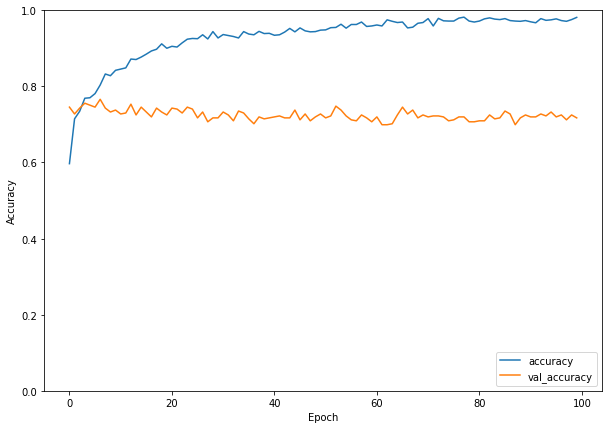

In [36]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_cnn_transfert_learning_VGG16.history['accuracy'], label='accuracy')
plt.plot(history_cnn_transfert_learning_VGG16.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_transfert_learning_VGG16", dpi=400, format='png') 

13/13 [==============================] - 0s 4ms/step - loss: 1.8741 - accuracy: 0.7172
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77        52
           1       0.60      0.61      0.60        41
           2       0.47      0.59      0.52        39
           3       0.81      0.72      0.76        47
           4       0.69      0.80      0.74        25
           5       0.61      0.57      0.59        35
           6       0.75      0.93      0.83        42
           7       0.88      0.92      0.90        39
           8       0.76      0.64      0.69        39
           9       0.76      0.73      0.75        30

    accuracy                           0.72       389
   macro avg       0.72      0.72      0.72       389
weighted avg       0.73      0.72      0.72       389



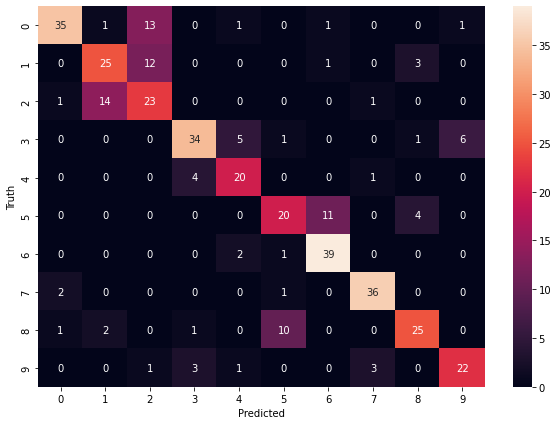

In [35]:
#performance du model
cnn_transfert_learning_VGG16.evaluate(X_test,y_test)
y_predicted = cnn_transfert_learning_VGG16.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_transfert_learning_VGG16", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

### VGG19

In [ ]:
image = X_resized_RGB

In [67]:
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
from keras.models import Model
image = preprocess_input(image)

In [68]:
model = VGG19()

574726144/574710816 [==============================] - 19s 0us/step


In [69]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [70]:
features_VGG19 = model.predict(image)

In [71]:
features_VGG19.shape

(1942, 4096)

In [72]:
with open("features_VGG19.joblib","wb") as f:
    dump(features_VGG19, f)

In [ ]:
features_VGG19 = load("features_VGG19.joblib")

In [ ]:
Y_encoded = load("Y_encoded.joblib")

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features_VGG19, Y_encoded, test_size=0.20, random_state = 7)

In [74]:
#convolutionnal neural network:

cnn_transfert_learning_VGG19 = models.Sequential([

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),    
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_transfert_learning_VGG19.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_transfert_learning_VGG19 = cnn_transfert_learning_VGG19.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

cnn_transfert_learning_VGG19.summary()

Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 1.5037 - accuracy: 0.5126 - val_loss: 1.3073 - val_accuracy: 0.6761
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 1.0592 - accuracy: 0.6581 - val_loss: 1.0590 - val_accuracy: 0.6941
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.9091 - accuracy: 0.6967 - val_loss: 0.9844 - val_accuracy: 0.7069
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 0.8266 - accuracy: 0.7186 - val_loss: 0.9183 - val_accuracy: 0.6941
Epoch 5/100
49/49 [==============================] - 0s 6ms/step - loss: 0.7721 - accuracy: 0.7424 - val_loss: 0.9340 - val_accuracy: 0.7095
Epoch 6/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.7669 - val_loss: 0.9217 - val_accuracy: 0.6684
Epoch 7/100
49/49 [==============================] - 0s 6ms/step - loss: 0.6453 - accuracy: 0.7630 - val_loss: 1.0077 - val_accuracy: 0.6581
Epoch 8/100
4

In [75]:
with open("cnn_transfert_learning_VGG16.joblib","wb") as f:
    dump(cnn_transfert_learning_VGG19, f)

INFO:tensorflow:Assets written to: ram://82ce9c4c-24e6-4ee4-aea7-85f2886b1b06/assets


In [76]:
with open("history_cnn_transfert_learning_VGG16.joblib","wb") as f:
    dump(history_cnn_transfert_learning_VGG19, f)

INFO:tensorflow:Assets written to: ram://5e72a72a-7344-4d2d-a5ae-3494326ff384/assets


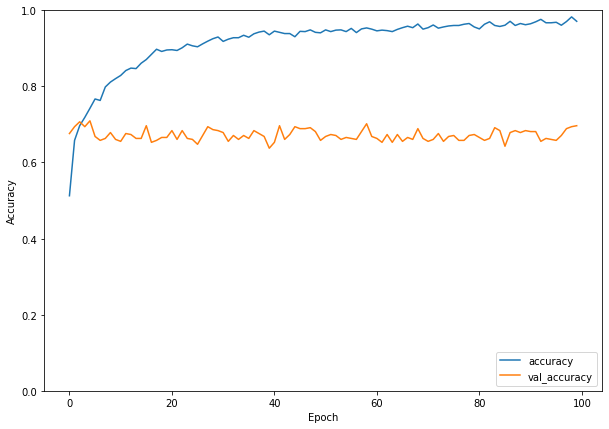

In [77]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_cnn_transfert_learning_VGG19.history['accuracy'], label='accuracy')
plt.plot(history_cnn_transfert_learning_VGG19.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_transfert_learning_VGG19", dpi=400, format='png') 

13/13 [==============================] - 0s 3ms/step - loss: 1.9778 - accuracy: 0.6967
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72        52
           1       0.62      0.51      0.56        41
           2       0.43      0.51      0.47        39
           3       0.85      0.70      0.77        47
           4       0.74      0.80      0.77        25
           5       0.59      0.54      0.57        35
           6       0.73      0.86      0.79        42
           7       0.82      0.92      0.87        39
           8       0.79      0.67      0.72        39
           9       0.69      0.73      0.71        30

    accuracy                           0.70       389
   macro avg       0.70      0.70      0.69       389
weighted avg       0.70      0.70      0.70       389



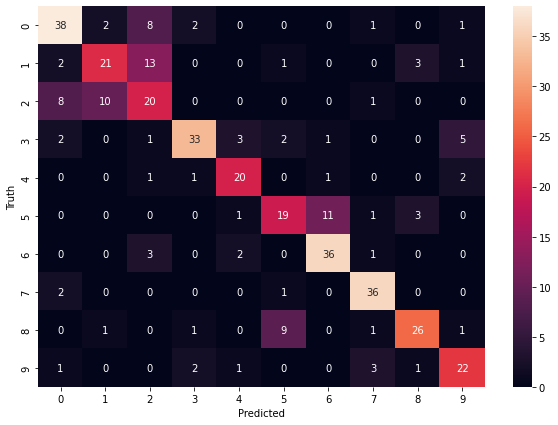

In [78]:
#performance du model
cnn_transfert_learning_VGG19.evaluate(X_test,y_test)
y_predicted = cnn_transfert_learning_VGG19.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_transfert_learning_VGG19", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

### MobileNet 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(image, Y_encoded, test_size=0.20, random_state = 7)

In [81]:
###load le model sans la derniere couche:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False) #creer le model mais non entrainable

#paramétre du modéle
num_of_labels = 10

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_labels)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_26 (Dense)            (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [82]:
#entrainement:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_cnn_transfert_learning_MobileNet = model.fit(X_train,y_train,epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
49/49 [==============================] - 66s 75ms/step - loss: 2.3448 - accuracy: 0.1681 - val_loss: 2.2085 - val_accuracy: 0.1877
Epoch 2/60
49/49 [==============================] - 3s 52ms/step - loss: 2.0501 - accuracy: 0.2646 - val_loss: 2.1043 - val_accuracy: 0.2519
Epoch 3/60
49/49 [==============================] - 3s 52ms/step - loss: 1.9197 - accuracy: 0.3181 - val_loss: 2.0725 - val_accuracy: 0.2828
Epoch 4/60
49/49 [==============================] - 3s 53ms/step - loss: 1.8113 - accuracy: 0.3799 - val_loss: 2.0744 - val_accuracy: 0.2674
Epoch 5/60
49/49 [==============================] - 3s 53ms/step - loss: 1.7378 - accuracy: 0.3934 - val_loss: 2.0777 - val_accuracy: 0.2596
Epoch 6/60
49/49 [==============================] - 3s 53ms/step - loss: 1.6618 - accuracy: 0.4398 - val_loss: 2.0507 - val_accuracy: 0.2674
Epoch 7/60
49/49 [==============================] - 3s 53ms/step - loss: 1.6031 - accuracy: 0.4668 - val_loss: 2.0827 - val_accuracy: 0.2674
Epoch 8/60
4

In [43]:
with open("cnn_transfert_learning_MobileNet.joblib","wb") as f:
    dump(model, f)

INFO:tensorflow:Assets written to: ram://8b871afa-41c0-4fd3-b2e1-504852600e6c/assets


INFO:tensorflow:Assets written to: ram://8b871afa-41c0-4fd3-b2e1-504852600e6c/assets


In [83]:
with open("history_cnn_transfert_learning_MobileNet.joblib","wb") as f:
    dump(history_cnn_transfert_learning_MobileNet, f)

INFO:tensorflow:Assets written to: ram://4d08ace1-4605-45c6-8d11-01bf67751590/assets


INFO:tensorflow:Assets written to: ram://4d08ace1-4605-45c6-8d11-01bf67751590/assets


In [44]:
cnn_transfert_learning_MobileNet = load("cnn_transfert_learning_MobileNet.joblib")

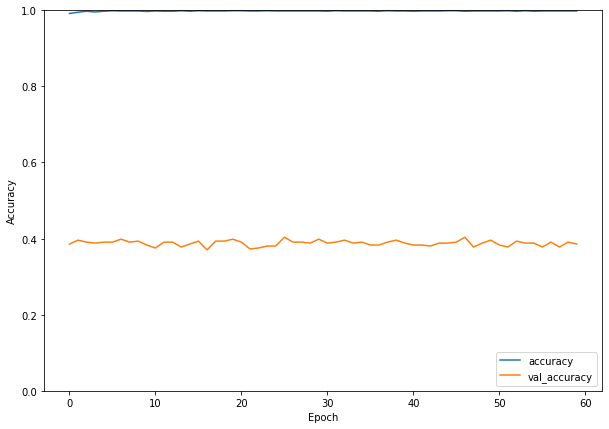

In [46]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_cnn_transfert_learning_MobileNet.history['accuracy'], label='accuracy')
plt.plot(history_cnn_transfert_learning_MobileNet.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_transfert_learning_MobileNet", dpi=400, format='png') 

13/13 [==============================] - 2s 53ms/step - loss: 2.2776 - accuracy: 0.3856
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.37      0.40        52
           1       0.42      0.39      0.41        41
           2       0.32      0.28      0.30        39
           3       0.45      0.36      0.40        47
           4       0.32      0.44      0.37        25
           5       0.16      0.09      0.11        35
           6       0.41      0.57      0.48        42
           7       0.53      0.41      0.46        39
           8       0.38      0.59      0.46        39
           9       0.30      0.33      0.32        30

    accuracy                           0.39       389
   macro avg       0.37      0.38      0.37       389
weighted avg       0.38      0.39      0.38       389



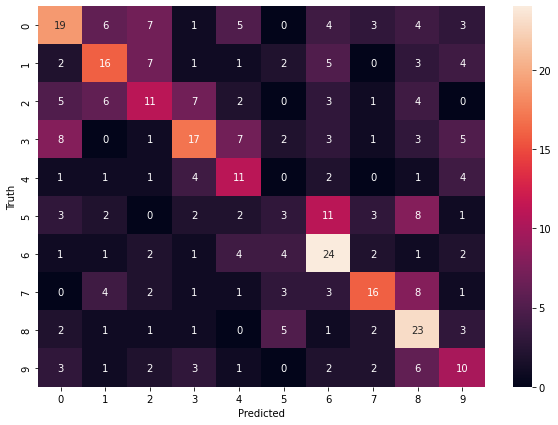

In [47]:
#performance du model
cnn_transfert_learning_MobileNet.evaluate(X_test,y_test)
y_predicted = cnn_transfert_learning_MobileNet.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_transfert_learning_MobileNet", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

### ResNEt

In [ ]:
image = X_resized_RGB

In [8]:
cnn_transfert_learning_ResNet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [43]:
image = preprocess_input(image)

In [11]:
cnn_transfert_learning_ResNet_test = Model(inputs=cnn_transfert_learning_ResNet.inputs, outputs=cnn_transfert_learning_ResNet.layers[-2].output)

In [12]:
features_ResNet = cnn_transfert_learning_ResNet_test.predict(image)

In [ ]:
features_ResNet = features_ResNet.reshape((features_ResNet.shape[0], features_ResNet.shape[1]*features_ResNet.shape[2]features_ResNet.shape[3]))

In [ ]:
features_ResNet.shape

(1942, 100352)

In [23]:
with open("features_ResNet.joblib","wb") as f:
    dump(features_ResNet, f)

In [15]:
Y_encoded = load("Y_encoded.joblib")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features_ResNet, Y_encoded, test_size=0.20, random_state = 7)

In [22]:
#convolutionnal neural network:

cnn_transfert_learning_ResNet = models.Sequential([

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),    
    layers.Dense(10, activation='softmax') #nombre de label
])

cnn_transfert_learning_ResNet.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_transfert_learning_ResNet = cnn_transfert_learning_ResNet.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

cnn_transfert_learning_ResNet.summary()

Epoch 1/100
49/49 [==============================] - 2s 23ms/step - loss: 2.5141 - accuracy: 0.1874 - val_loss: 2.0921 - val_accuracy: 0.1440
Epoch 2/100
49/49 [==============================] - 1s 16ms/step - loss: 1.9292 - accuracy: 0.3181 - val_loss: 1.8400 - val_accuracy: 0.3445
Epoch 3/100
49/49 [==============================] - 1s 16ms/step - loss: 1.5557 - accuracy: 0.4701 - val_loss: 1.2925 - val_accuracy: 0.5810
Epoch 4/100
49/49 [==============================] - 1s 16ms/step - loss: 1.3565 - accuracy: 0.5306 - val_loss: 1.2573 - val_accuracy: 0.5296
Epoch 5/100
49/49 [==============================] - 1s 16ms/step - loss: 1.2628 - accuracy: 0.5486 - val_loss: 1.3456 - val_accuracy: 0.4910
Epoch 6/100
49/49 [==============================] - 1s 16ms/step - loss: 1.2473 - accuracy: 0.5551 - val_loss: 1.2808 - val_accuracy: 0.5347
Epoch 7/100
49/49 [==============================] - 1s 16ms/step - loss: 1.2560 - accuracy: 0.5570 - val_loss: 1.2465 - val_accuracy: 0.5630
Epoch 

In [24]:
with open("cnn_transfert_learning_ResNet.joblib","wb") as f:
    dump(cnn_transfert_learning_ResNet, f)

INFO:tensorflow:Assets written to: ram://1df13163-767d-4c47-a8b9-7252c7fb0ae4/assets


In [25]:
with open("history_cnn_transfert_learning_ResNet.joblib","wb") as f:
    dump(history_cnn_transfert_learning_ResNet, f)

INFO:tensorflow:Assets written to: ram://1e9c42ce-3b9a-4fd0-a489-d4f36a2ec9ea/assets


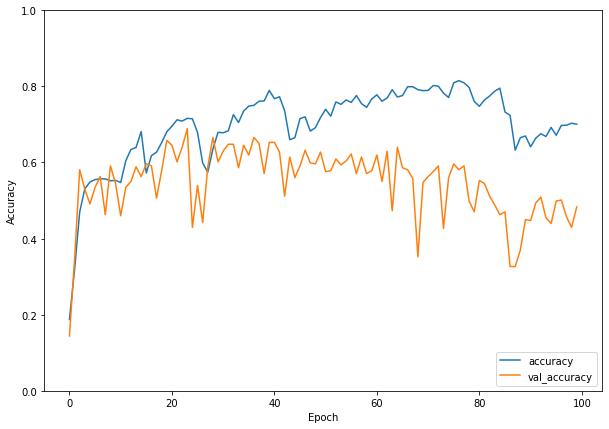

In [26]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_cnn_transfert_learning_ResNet.history['accuracy'], label='accuracy')
plt.plot(history_cnn_transfert_learning_ResNet.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_transfert_learning_ResNet", dpi=400, format='png') 

13/13 [==============================] - 0s 13ms/step - loss: 1.6219 - accuracy: 0.4833
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.21      0.34        52
           1       0.33      0.02      0.05        41
           2       0.29      0.90      0.44        39
           3       0.56      0.66      0.61        47
           4       0.49      0.80      0.61        25
           5       0.76      0.37      0.50        35
           6       0.40      0.83      0.54        42
           7       0.81      0.77      0.79        39
           8       0.00      0.00      0.00        39
           9       0.86      0.40      0.55        30

    accuracy                           0.48       389
   macro avg       0.54      0.50      0.44       389
weighted avg       0.54      0.48      0.43       389



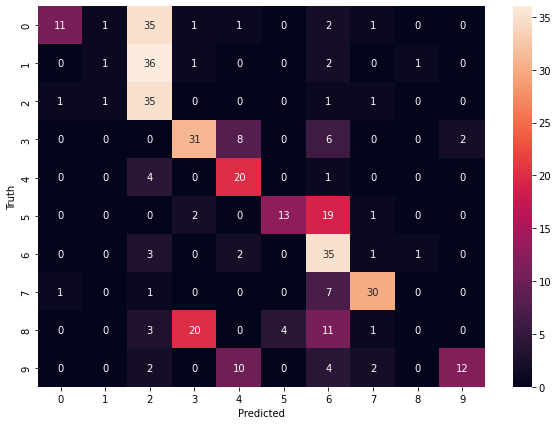

In [27]:
#performance du model
cnn_transfert_learning_ResNet.evaluate(X_test,y_test)
y_predicted = cnn_transfert_learning_ResNet.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix_transfert_learning_ResNet", dpi=400, format='png') 
# rapport de classification:

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

### Résultats

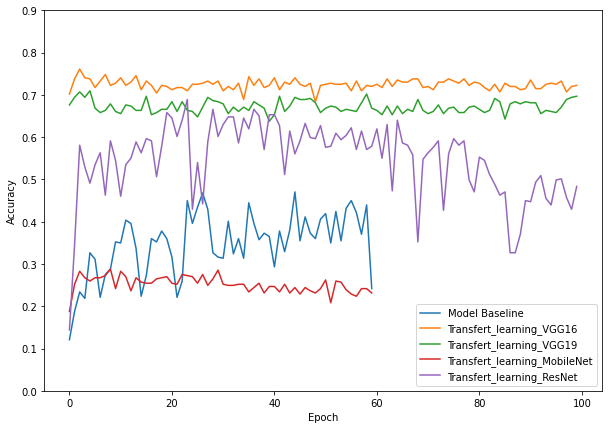

In [88]:
#graphique de l'évaluation:
plt.figure(figsize=(10,7))
plt.plot(history_cnn_final.history['val_accuracy'], label='Model Baseline')
plt.plot(history_cnn_transfert_learning_VGG16.history['val_accuracy'], label = 'Transfert_learning_VGG16')
plt.plot(history_cnn_transfert_learning_VGG19.history['val_accuracy'], label = 'Transfert_learning_VGG19')
plt.plot(history_cnn_transfert_learning_MobileNet.history['val_accuracy'], label = 'Transfert_learning_MobileNet')
plt.plot(history_cnn_transfert_learning_ResNet.history['val_accuracy'], label = 'Transfert_learning_ResNet')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 0.9])
plt.legend(loc='lower right')
plt.savefig("Accuracy_Transfert_learning_CNNs", dpi=400, format='png') 

Le meilleur modèle utilisant le transfert learning correspond à celui avec VGG16

# Programme python de prédiction de classe (GUI = tkinter)

In [18]:
# -*- coding: utf-8 -*-

# Outil pour la classification d'image de chien (retourne le nom d'une race présumée)
# Author : Aurélien Corroyer-Dulmont
# Version : v1.0 / 02 juin 2022

import tensorflow
from utils.data_utils import *
from utils.models import *
from tensorflow import keras

from tkinter import *
import tkinter as tk
from tkinter import ttk
import codecs
import pandas as pad
import os 
import sys
import win32com.client
from tkinter.filedialog import askdirectory
from path import Path
from PIL import Image


def CaniNetModel():
	## Récupération de l'image et formattage
	Inputpath = askdirectory(title="Dossier contenant l'image à classifier")

	for f in Path(Inputpath).walkfiles():
	    image_filepath = str(f)

	image = Image.open(image_filepath)
	resized_image = image.resize((224,224))

	## Prédiction
	#encoded_race_predicted = 5 #pour test
    cnn_transfert_learning_VGG16 = load("cnn_transfert_learning_VGG16.joblib")
	encoded_race_predicted = cnn_transfert_learning_VGG16.predict(resized_image)
	dict_race = {0:"Afghan_hound", 1:"Blenheim_spaniel", 2:"Japanese_spaniel", 3:"Maltese_dog", 4:"Pekinese", 5:"Rhodesian_ridgeback", 6:"Tzu", 7:"basset", 8:"papillon", 9:"toy_terrier"}
	race_predicted = dict_race[encoded_race_predicted]

	## Enregistrement et présentation des résultats 
	savepath = Inputpath + "/result.txt"
	filesave = codecs.open(savepath, 'w', encoding='Latin-1')
	filesave.write(u"Résultats de la classification : ")
	filesave.write("\n\n")
	filesave.write(str(race_predicted))
	filesave.close()
	os.startfile(savepath)


class CaniNet_GUI:

	def __init__(self):

		self.window = Tk()
		self.window.title("CaniNet - Programme de classification d'images de chien")
		self.window.geometry("700x300")
		self.window.minsize(480, 400)
		self.window.config(background='#2086dc')

		label_bandeau = Label(self.window, text="                          ", font=("Courrier", 10),background='#2086dc')
		label_bandeau.pack()

		label_window = Label(self.window, text="Bienvenue sur CaniNet", font=("Calibri", 20))
		label_window2 = Label(self.window, text="Programme de classification d'images de chien", font=("Calibri", 18, "italic"))
		label_window.pack()
		label_window2.pack()

		style = ttk.Style()
		style.configure('TNotebook.Tab', font=('Calibri','13','bold'))

		# create notebook
		self.notebook2 = ttk.Notebook(self.window)
		self.notebook2.pack(pady=10, expand=True)

		# create frames
		self.frame3 = ttk.Frame(self.notebook2, width=1500, height=1500)
		self.frame11 = ttk.Frame(self.notebook2, width=1500, height=800)

		self.frame3.pack(fill='both', expand=True)
		self.frame11.pack(fill='both', expand=True)

		# add frames to notebook
		self.notebook2.add(self.frame3, text=' Classification ')
		self.notebook2.add(self.frame11, text=' A propos ')


		### Frame classification ###
		label_start_algo = Button(self.frame3, text="Lancer l'algorithme de classification", command= CaniNetModel, font=("Courrier", 15),background="chartreuse3").place(x=140, y=60)
		label_ou_txt3 = Label(self.frame3, text="                                                                                               ")
		label_ou_txt3.grid(pady=10, padx=20, sticky = W, row=8, column=8)


		### Frame A propos ###
		label_A_propos = Label(self.frame11, text="CaniNet", font=("Courrier", 18),fg='black')
		label_A_propos.grid(pady=5, sticky = N, row=2, column=1)
		label_A_propos2 = Label(self.frame11, text="Programme de classification d'images de chien", font=("Courrier", 10),fg='black')
		label_A_propos2.grid(pady=2, sticky = N, row=3, column=1)
		label_A_propos3 = Label(self.frame11, text="Licence : ""GPL-3.0 License""", font=("Courrier", 10),fg='black')
		label_A_propos3.grid(pady=2, sticky = N, row=4, column=1)
		label_A_propos4 = Label(self.frame11, text="Auteur : Aurélien Corroyer-Dulmont, corroyer@cyceron.fr", font=("Courrier", 10),fg='black')
		label_A_propos4.grid(pady=2, sticky = N, row=5, column=1)
		label_A_propos5 = Label(self.frame11, text="Version : v1.1 ; Date : Juin 2022", font=("Courrier", 10),fg='black')
		label_A_propos5.grid(pady=2, sticky = N, row=6, column=1)
		label_A_propos6 = Label(self.frame11, text="Code disponible : https://github.com/AurelienCD/Formation_OCR_Ing_Machine_Learning/CaniNet.py", font=("Courrier", 10),fg='black')
		label_A_propos6.grid(pady=2, sticky = N, row=7, column=1)
		label_A_proposxx = Label(self.frame11, text="           ", font=("Courrier", 15),fg='black')
		label_A_proposxx.grid(pady=1, sticky = N, row=8, column=1)


# afficher
app = CaniNet_GUI()
app.window.mainloop()

'Rhodesian_ridgeback'